In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Objective:
To visualize how honey production has changed over the years(1998-2021) in the United States.

In [2]:
df = pd.read_csv('honeyproduction 1998-2021.csv')
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

### Q1) How has honey production yield changed from 1998 to 2021?

In [4]:
Prod_bet_1998_2021 = df.groupby('year')['yieldpercol'].mean().reset_index()
Prod_bet_1998_2021.head()

,year,yieldpercol
0,1998,69.953488
1,1999,65.465116
2,2000,67.581395
3,2001,64.545455
4,2002,66.795455


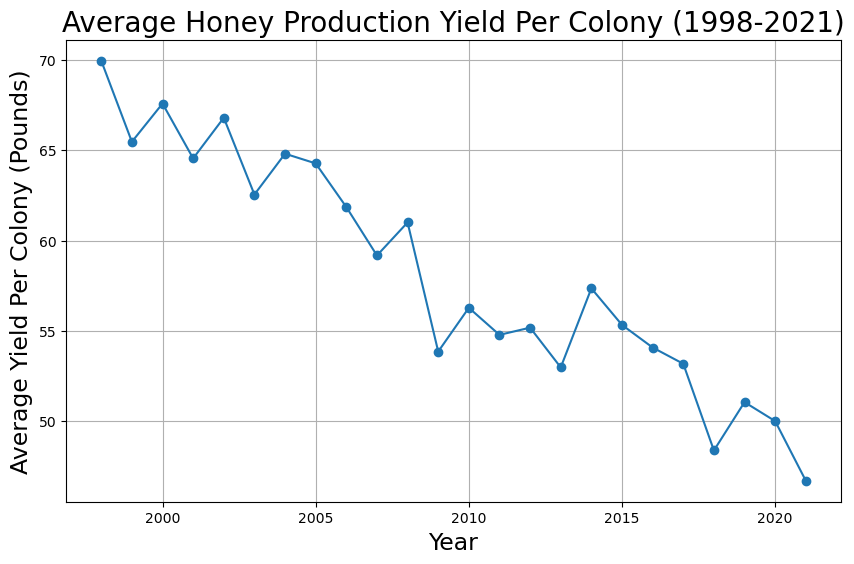

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(Prod_bet_1998_2021['year'], Prod_bet_1998_2021['yieldpercol'], marker='o')
plt.title('Average Honey Production Yield Per Colony (1998-2021)', size=20)
plt.xlabel('Year', size=17)
plt.ylabel('Average Yield Per Colony (Pounds)', size=17)
plt.grid(True)
plt.show()

**The analysis of honey production yield from 1998 to 2021 indicates a gradual reduction in the average yield per colony over the years. In 1998, the average yield per colony stood at 69.95 pounds, and this figure consistently decreased annually. By 2021, the average yield per colony reached 46.70 pounds.**

### Q2) Over time, what are the major production trends across the states?

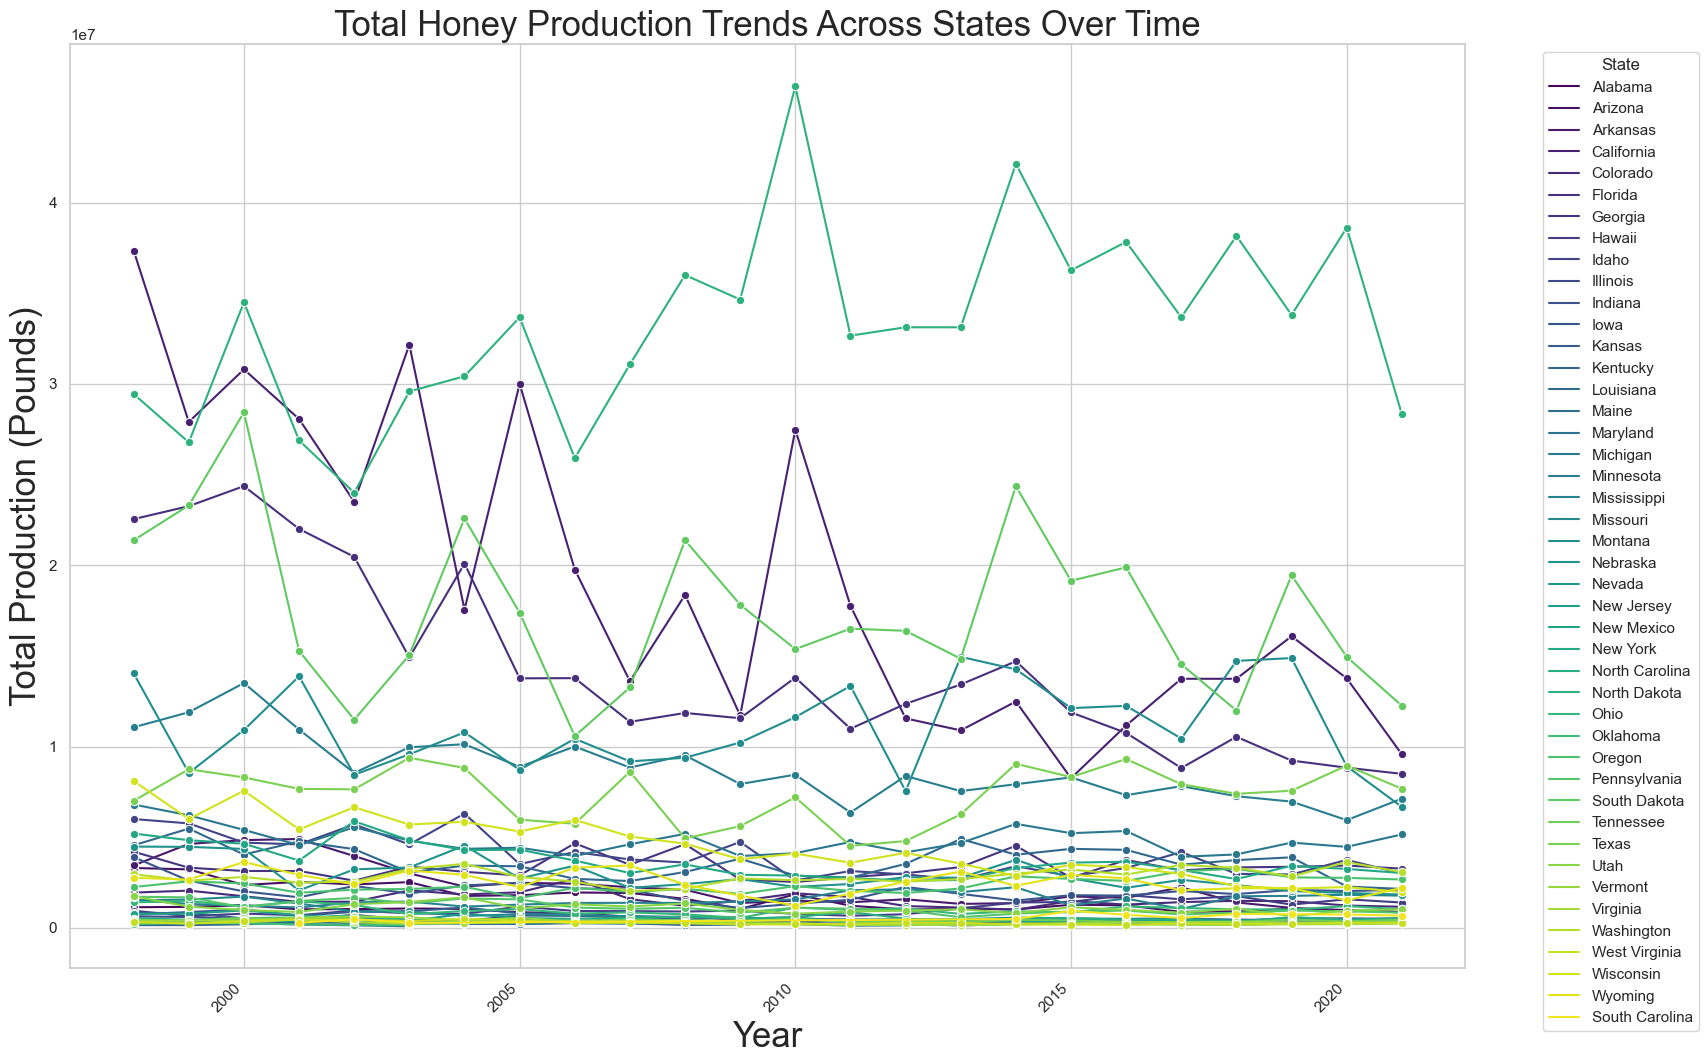

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,12))
sns.lineplot(data=df, x='year', y='totalprod', hue='State', marker='o', palette='viridis')
plt.title('Total Honey Production Trends Across States Over Time', size=25)
plt.xlabel('Year', size=25)
plt.ylabel('Total Production (Pounds)', size=25)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

**The visualization of total honey production trends across states over time reveals interesting patterns. While there is a notable variation in production levels among states, the majority exhibit relatively low honey production. Only a select few states stand out as significant contributors to the total production, showcasing concentrated honey-producing regions.**

### Q3) Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

In [10]:
df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [11]:
df_2006 = df[df['year']<2006]
trend_before_2006 = df_2006.groupby('year')[['numcol', 'yieldpercol']].mean().reset_index()
trend_before_2006

,year,numcol,yieldpercol
0,1998,60953.488372,69.953488
1,1999,61325.581395,65.465116
2,2000,60558.139535,67.581395
3,2001,57772.727273,64.545455
4,2002,58295.454545,66.795455
5,2003,58886.363636,62.545455
6,2004,61926.829268,64.804878
7,2005,58390.243902,64.268293


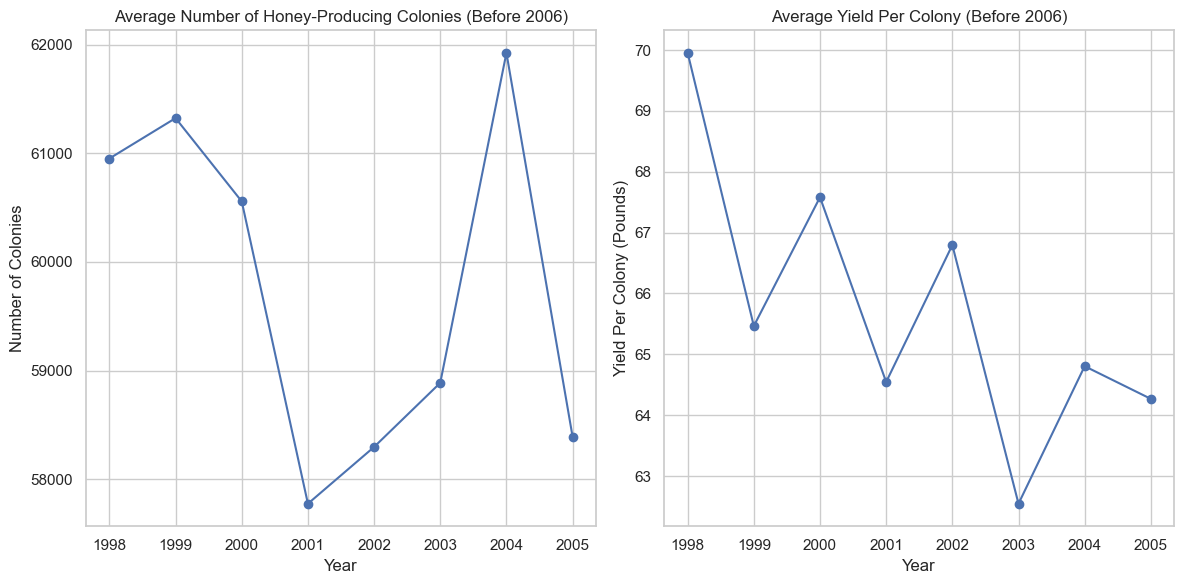

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(trend_before_2006['year'], trend_before_2006['numcol'], marker='o')
plt.title('Average Number of Honey-Producing Colonies (Before 2006)')
plt.xlabel('Year')
plt.ylabel('Number of Colonies')

# Plot yield per colony
plt.subplot(1, 2, 2)
plt.plot(trend_before_2006['year'], trend_before_2006['yieldpercol'], marker='o')
plt.title('Average Yield Per Colony (Before 2006)')
plt.xlabel('Year')
plt.ylabel('Yield Per Colony (Pounds)')

plt.tight_layout()
plt.show()

**The visual analysis of honey production trends before 2006 unveils contrasting patterns in the two subplots:**<br>

**1. Average Number of Honey-Producing Colonies:**

 - The first subplot illustrates a consistent upward trend in the average number of honey-producing colonies each year.<br>
 - However, a slight dip is observed in 2021, suggesting a deviation from the overall increasing trend.<br>

**Average Yield Per Colony:**
 - The second subplot reveals a clear decreasing trend in the average yield per colony over the years.<br>
 - In 2021, the average yield per colony is at its lowest, indicating potential challenges or changes in conditions affecting honey production efficiency.

### Q4)Are there any patterns that can be observed between total honey production and the value of production every year?

In [15]:
yearly_production = df.groupby('year')[['totalprod','prodvalue']].sum().reset_index()
yearly_production.head()

,year,totalprod,prodvalue
0,1998,219519000.0,146091000.0
1,1999,202387000.0,123657000.0
2,2000,219558000.0,131568000.0
3,2001,185748000.0,132282000.0
4,2002,171265000.0,227302000.0


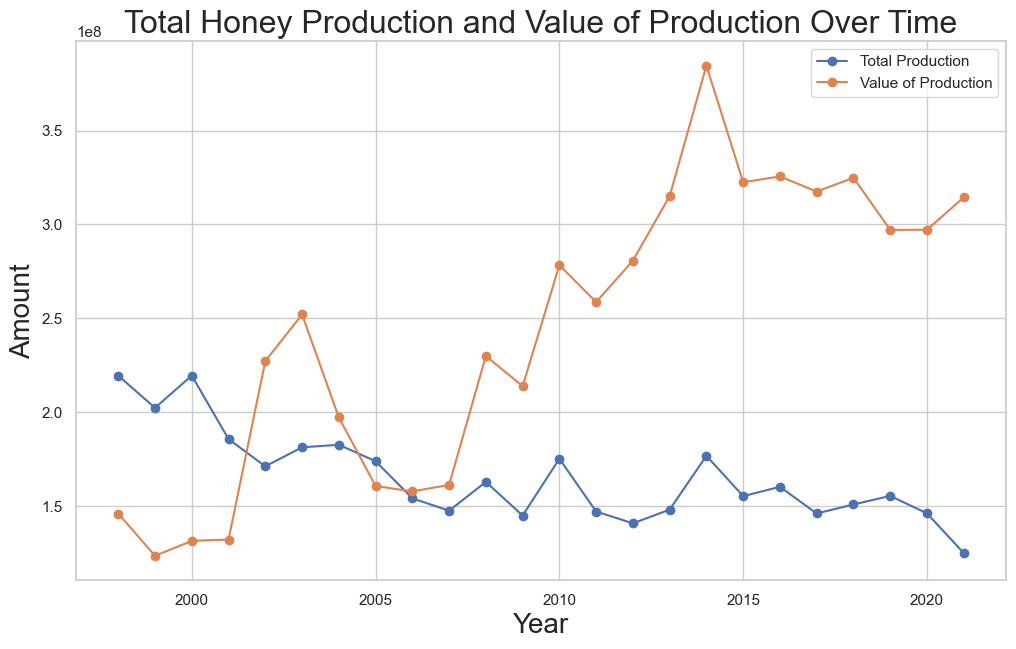

In [16]:
plt.figure(figsize=(12,7))
plt.plot(yearly_production['year'],yearly_production['totalprod'],label='Total Production', marker='o')
plt.plot(yearly_production['year'],yearly_production['prodvalue'],label='Value of Production', marker='o')
plt.title('Total Honey Production and Value of Production Over Time', size=23)
plt.xlabel('Year', size=20)
plt.ylabel('Amount', size=20)
plt.legend()
plt.grid(True)
plt.show()

**The combined line plot of total honey production and the value of production over time provides valuable insights:**

 **Total Honey Production:**
 - The plot illustrates a consistent decline in total honey production each year until 2021.<br>
 - This declining trend in total production signals a potential challenge or shift in honey production dynamics that requires further exploration.<br><br>
**Value of Production:**
 - On the other hand, the value of production shows a generally increasing trend over the years.<br>
 - A slight decrease is observed in the last few years (2015 to 2021), indicating a possible dip in the economic value associated with honey production.

### Q5) How has the value of production, which in some sense could be tied to demand, changed every year?

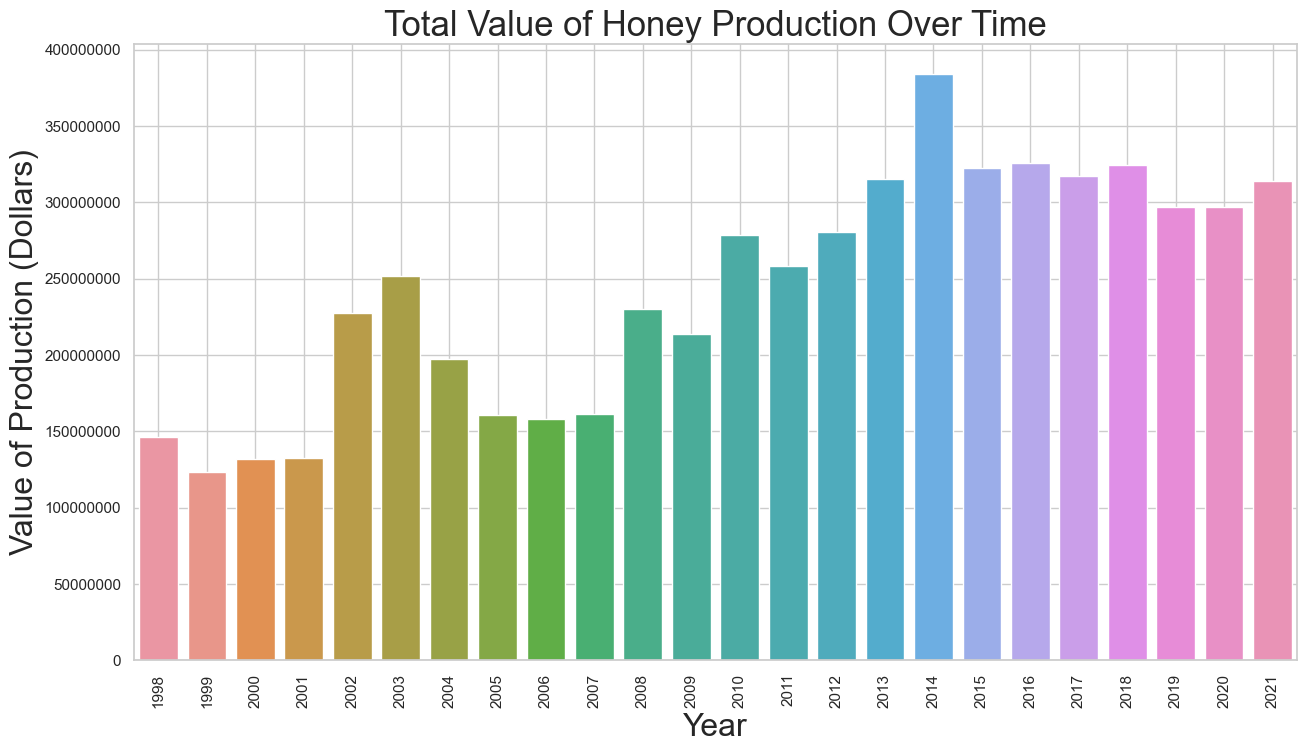

In [17]:
yearly_value_of_production = df.groupby('year')['prodvalue'].sum().reset_index()


plt.figure(figsize=(15, 8))
ax=sns.barplot(data=yearly_value_of_production, x='year', y='prodvalue')
ax.ticklabel_format(style='plain', axis="y")
plt.title('Total Value of Honey Production Over Time', size=25)
plt.xlabel('Year', size=23)
plt.ylabel('Value of Production (Dollars)', size=23)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**In summary, the bar plot underscores the positive economic trajectory of the honey industry, with a consistent increase in the total value of production over the analyzed period. The standout year in 2014 warrants further exploration to identify contributing factors to such exceptional performance**

### Q6) Construct the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.

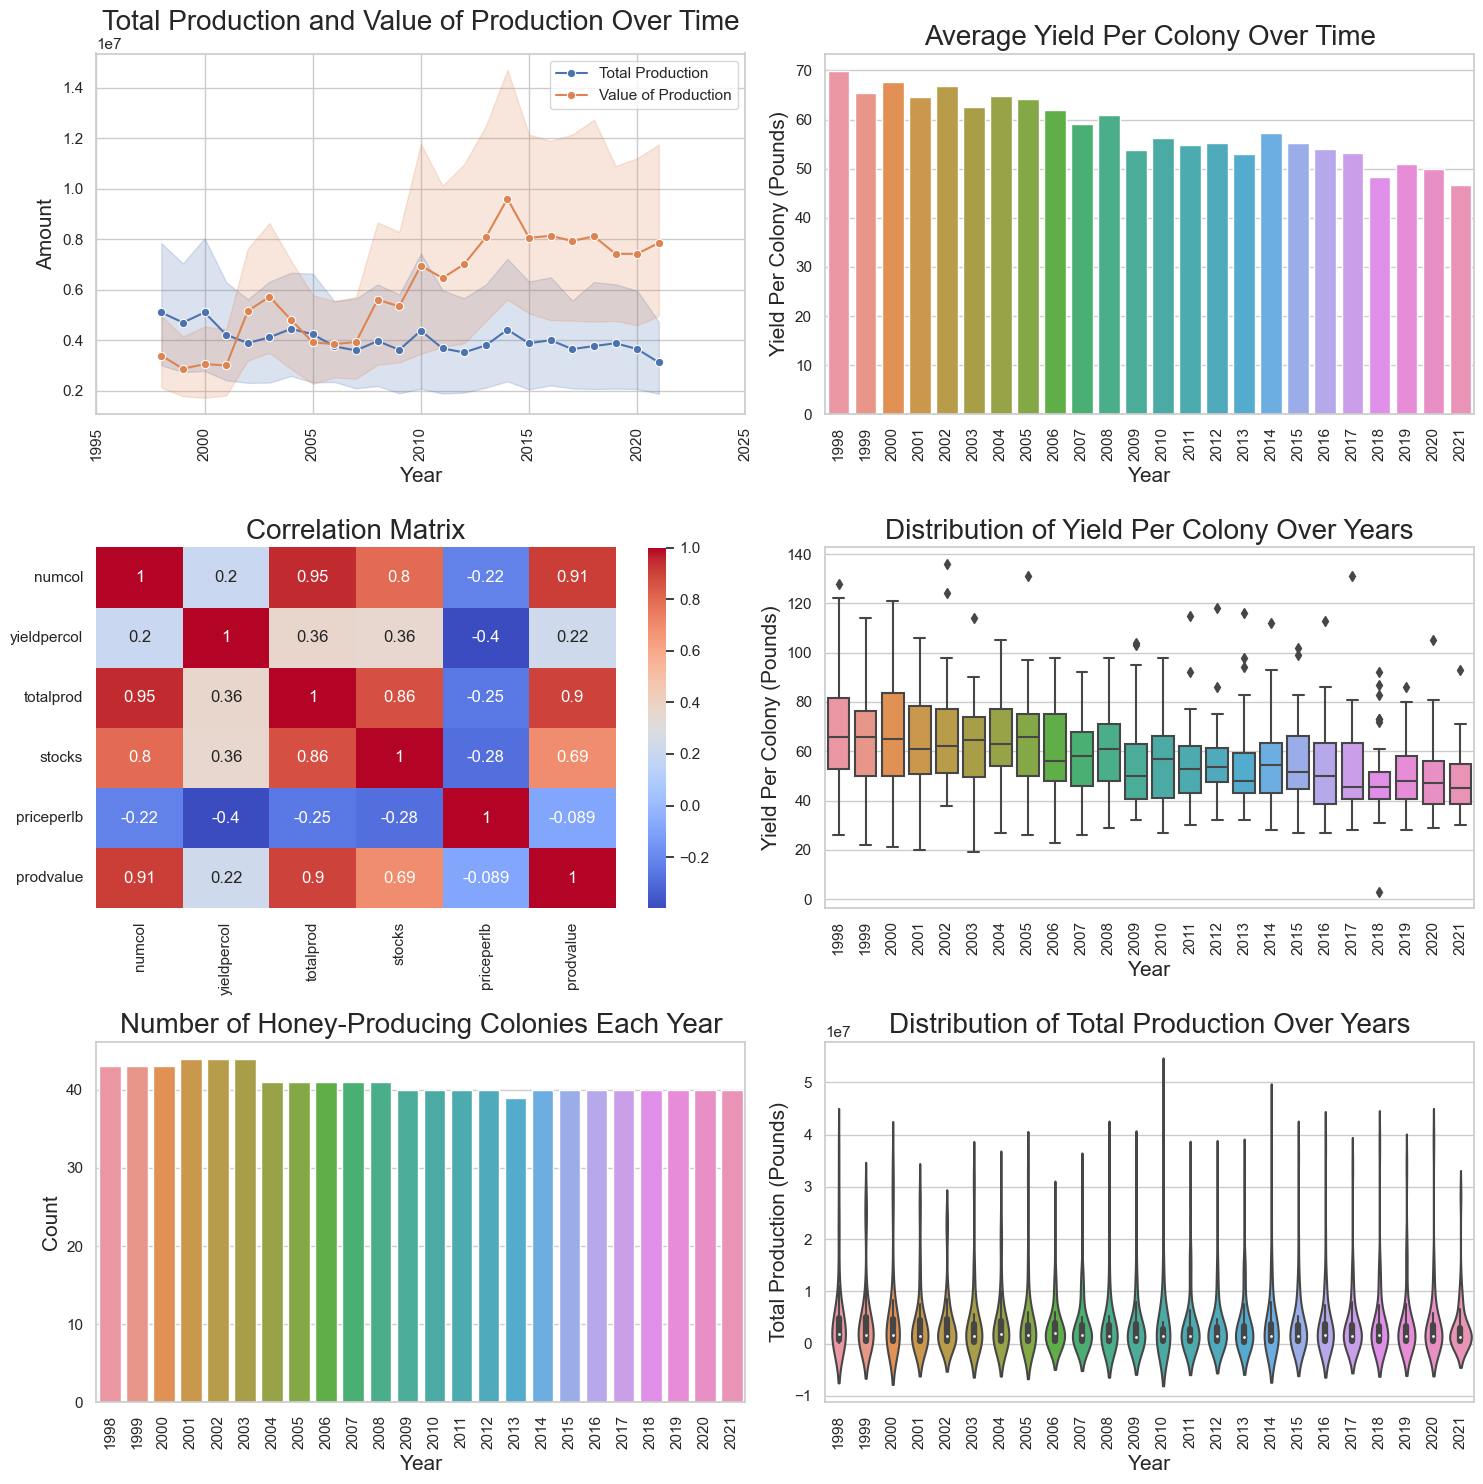

In [18]:
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Line plot for total production and value of production
sns.lineplot(data=df, x='year', y='totalprod', label='Total Production', marker='o', ax=axes[0, 0])
sns.lineplot(data=df, x='year', y='prodvalue', label='Value of Production', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Total Production and Value of Production Over Time', size=20)
axes[0, 0].set_xlabel('Year', size=15)
axes[0, 0].set_ylabel('Amount', size=15)
axes[0, 0].legend()
axes[0, 0].set_xticks(axes[0, 0].get_xticks())
axes[0, 0].tick_params(axis='x', rotation=90)

# Bar plot for average yield per colony
sns.barplot(data=df, x='year', y='yieldpercol', ci=0, ax=axes[0, 1])
axes[0, 1].set_title('Average Yield Per Colony Over Time', size=20)
axes[0, 1].set_xlabel('Year', size=15)
axes[0, 1].set_ylabel('Yield Per Colony (Pounds)', size=15)
axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].tick_params(axis='x', rotation=90)

# Heatmap for correlation matrix
corr_matrix = df[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix', size=20)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Box plot for distribution of yield per colony
sns.boxplot(data=df, x='year', y='yieldpercol', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Yield Per Colony Over Years', size=20)
axes[1, 1].set_xlabel('Year', size=15)
axes[1, 1].set_ylabel('Yield Per Colony (Pounds)', size=15)
axes[1, 1].set_xticks(axes[1, 1].get_xticks())
axes[1, 1].tick_params(axis='x', rotation=90)

# Count plot for the number of honey-producing colonies each year
sns.countplot(data=df, x='year', ax=axes[2, 0])
axes[2, 0].set_title('Number of Honey-Producing Colonies Each Year', size=20)
axes[2, 0].set_xlabel('Year', size=15)
axes[2, 0].set_ylabel('Count', size=15)
axes[2, 0].set_xticks(axes[2, 0].get_xticks())
axes[2, 0].tick_params(axis='x', rotation=90)

# Violin plot for distribution of total production each year
sns.violinplot(data=df, x='year', y='totalprod', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Total Production Over Years', size=20)
axes[2, 1].set_xlabel('Year', size=15)
axes[2, 1].set_ylabel('Total Production (Pounds)', size=15)
axes[2, 1].set_xticks(axes[2, 1].get_xticks())
axes[2, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
